In [12]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; 
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



import pycwt as wavelet; mother = wavelet.Morlet(6)
from scipy import stats
from scipy import signal

import read_data as rd
import behavior_track as bt; import behavior_plot as bp
import turning_track  as tt
import time2frequency as t2f
import comparison as cmp
import philters
fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;
N = int((1/fps)/T/2+1);

/Users/ziyingc/Dropbox/Lab/MotorCortex
/Users/ziyingc/Dropbox/Lab/MotorCortex


# Movement Initiation

In [13]:
erfdn = np.load('Rats/Rats_ephy.npy')[[1]]
test = False

# T1 = int(4.0*fps);np.save('Rats/T1.npy', T1);
# T2 = int(5.0*fps);np.save('Rats/T2.npy', T2);
# d_min = 1.5; d_max = 3.0;

T1 = int(3.0*fps);np.save('Rats/T1.npy', T1);
T2 = int(4.0*fps);np.save('Rats/T2.npy', T2);
d_min = 1.5; d_max = 3.0;

T_pre = 0
print(T1, T2)
N_win = 3
t = np.arange(T2);
rr = 0
for rfdn in erfdn:
    epn    = np.load(rfdn+'tracking'+'/epn_ephy.npy')#[15:20]
    idx_T = np.empty((0,));
#     tt.displacement(rfdn, epn, T1, T2, d_min, d_max)
#     tt.displacement_rand(rfdn, epn, fs_out, T1, T2, 5)
    n_acc_total = 0
    for k in epn:
        fdn = rfdn + k + '/'
        ts_f  = np.load(fdn+'tracking/'+'ts_f.npy');
        
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy')

        pos_Y = np.load(fdn+'tracking/'+'pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/'+'pos_X_f.npy')
        
        pos_Y = np.convolve(pos_Y, np.ones((6,))/6, mode='same')
        pos_X = np.convolve(pos_X, np.ones((6,))/6, mode='same')

        XY    = np.array([pos_X, pos_Y]).T;
        t_acc_f = np.load(fdn+'tracking/idx_acc_f.npy').astype('int');
        T_acc_f = np.empty((0,));
        v_acc_f_max = np.empty((0,));
        n_acc = len(t_acc_f)
        n_acc_total = n_acc_total + n_acc
        if n_acc>0:
            for i in np.arange(n_acc):
                i_ref = t_acc_f[i];
                # align
                d_max_T2, d_i, d_j, dis= tt.max_distance(XY[i_ref:i_ref+T2,:], d_min*1.0, T1-T1);
                if d_j>T2 or d_j<T1:
                    T_acc_f = np.append(T_acc_f,0)
                    print(k, 0, d_j, T2, ':problem?????')
                else: T_acc_f = np.append(T_acc_f,int((d_j-T1)))

        np.save(fdn+'tracking/T_acc_f.npy', T_acc_f);
    print(rfdn, 'sessions', len(epn), n_acc_total)
    rr += 1

90 120
Rats/Screws_Rats/Rat_Outlaw/ sessions 61 216


# Movement Initiation Alignment

90 120
0.004651162790697674
ws_Rat sessions 61 216 ref: 183 209 7 0.97


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


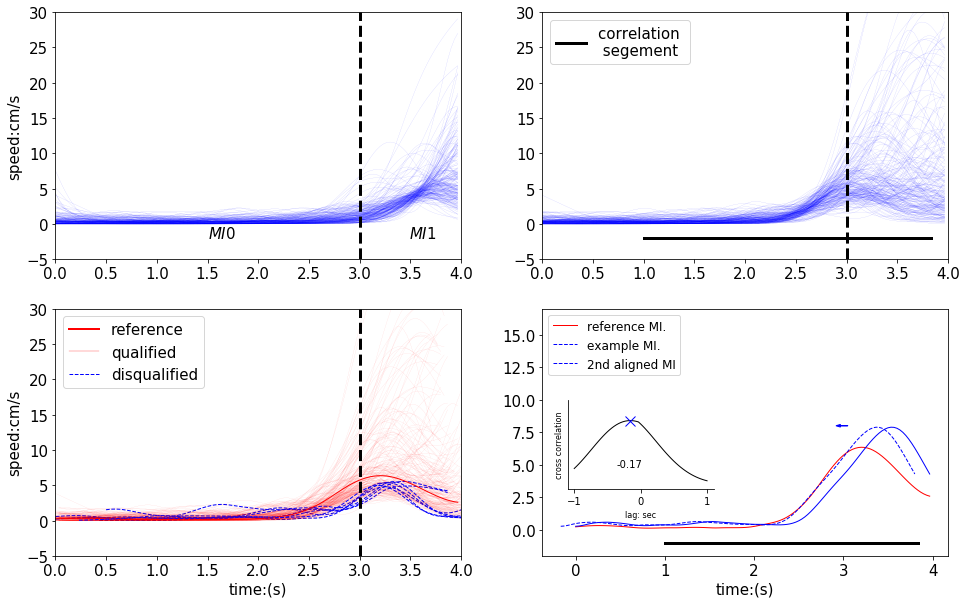

In [36]:
erfdn = np.load('Rats/Rats_ephy.npy')[[1]]

print(T1, T2)
fig = plt.figure(1, figsize=(16, 10))
gs  = GridSpec(2 , 2);
N_win = 10
t = np.arange(T2+T_pre)/fps;

rr = 0
for rfdn in erfdn:
    epn    = np.load(rfdn+'tracking'+'/epn_ephy.npy');
    n_acc_total = 0
    v_seg_0  = np.empty((0,T_pre+T2));
    v_seg_1  = np.empty((0,T_pre+T2));
    idx_T = np.empty((0,));
    idx_T1 = np.empty((0,));
    idx_T2 = np.empty((0,));
    T_k    = np.empty((0,));
    
    kk = 0
    for k in epn:
        fdn = rfdn + k + '/'
        
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        l_t = np.sum(idx_clean)/fps/60
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        t_acc_f = np.load(fdn+'tracking/idx_acc_f.npy').astype('int');      
        n_acc = len(t_acc_f)
        
        T_acc_f = np.load(fdn+'tracking/T_acc_f.npy').astype('int');
        pos_Y = np.load(fdn+'tracking/pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/pos_X_f.npy')
        pos_Y = np.convolve(pos_Y, np.ones((6,))/6, mode='same')
        pos_X = np.convolve(pos_X, np.ones((6,))/6, mode='same')
        XY    = np.array([pos_X, pos_Y]).T;
        dis_ac = np.empty((0,));
        if n_acc>0:
            idx_ac = np.zeros((n_acc,))>1;
            for i in np.arange(n_acc):
                
                v_seg_0 = np.vstack((v_seg_0, spd_f[t_acc_f[i]:t_acc_f[i]+T2]))
                i_ref = t_acc_f[i]+T_acc_f[i]
                
                v_seg_1 = np.vstack((v_seg_1, spd_f[i_ref:i_ref+T2]))
                
                d_max_T2, dis = tt.max_distance_k(XY[i_ref:i_ref+T2,:],    d_max*3/3, T2 - 30);
                idx_T  = np.append(idx_T,  d_max_T2)
                
#                 d_max_T2, dis = tt.max_distance_k(XY[i_ref:i_ref+T2,:],    d_max*1.0, T2-10);
                dis_ac = np.append(dis_ac, dis)
                idx_ac[i] = d_max_T2

        # indexing the event
        idx_acc_f_k = np.arange(n_acc_total, n_acc_total+n_acc)
        np.save(fdn+'tracking/idx_acc_f_k.npy', idx_acc_f_k);
        np.save(fdn+'tracking/dis_ac.npy',      dis_ac);
        n_acc_total = n_acc_total+n_acc
        
        T_k  = np.append(T_k,l_t)
        kk = kk+1
        
#     v_seg = v_seg[idx_T.astype('bool'), :]
    n_ac, T = v_seg_1.shape

    lag_m, lag_s, idx_lag_m = tt.align_acc(v_seg_1, 30, T1-60, T2-5)
#     idx_T = np.logical_and(idx_T1, idx_T2)
#     lag_m = np.zeros((n_ac,))
    np.save(rfdn+'tracking/lag_m.npy',       lag_m);
    np.save(rfdn+'tracking/idx_acc_f_T.npy', idx_T.astype('bool'));
    lag_m = lag_m/fps
    n_acc_T1 = 0
    n_acc_T2 = 0
    n_acc_T  = 1
    lwdh = 0.05
    for i in np.arange(n_ac):
        if i == idx_lag_m:  lw_mpl = 20
        else:  lw_mpl = 1
        ax_idx = gs[0];ax = fig.add_subplot(ax_idx)
        ax.plot(t, v_seg_0[i,:], 'b', lw = lwdh)
        
        ax_idx = gs[1];ax = fig.add_subplot(ax_idx)
        ax.plot(t, v_seg_1[i,:], 'b', lw = lwdh)
        
        ax_idx = gs[2];ax = fig.add_subplot(ax_idx)
        
        if  i == idx_lag_m:
            ax.plot(t+lag_m[i], v_seg_1[i,:], 'r', lw = lwdh*lw_mpl)
            n_acc_T = n_acc_T+1
        elif idx_T[i]:
            ax.plot(t+lag_m[i], v_seg_1[i,:], 'r--', lw = lwdh)
            n_acc_T = n_acc_T+1
        else:
            ax.plot(t+lag_m[i], v_seg_1[i,:], 'b--', lw = 1)
    ax_idx = gs[1];ax = fig.add_subplot(ax_idx)
    ax.plot(t[[T1-60,T2-5]], [-2,-2], 'k', lw = 3)
    
    print(rfdn[9:15], 'sessions', len(epn), n_acc_total, 'ref:',idx_lag_m,
          int(np.sum(idx_T)), n_acc_total-int(np.sum(idx_T)),
          np.round(np.sum(idx_T)/n_acc_total,2))
    ax_idx = gs[0];ax = fig.add_subplot(ax_idx);ax.set_ylim([-5,30]);ax.set_xlim([0,4]);  
    ax.plot([t[T1],t[T1]],[-5,30], 'k--', lw = 3)
    ax_idx = gs[1];ax = fig.add_subplot(ax_idx);ax.set_ylim([-5,30]);ax.set_xlim([0,4]);
    ax.plot([t[T1],t[T1]],[-5,30], 'k--', lw = 3)
    ax_idx = gs[2];ax = fig.add_subplot(ax_idx);ax.set_ylim([-5,30]);ax.set_xlim([0,4]);
    ax.plot([t[T1],t[T1]],[-5,30], 'k--', lw = 3)
    
    ac1 = idx_lag_m
    ac2 = 120
    v_ij_cor = np.correlate(v_seg_1[ac1, T1-60:T2-5], v_seg_1[ac2, T1-60:T2-5], "full")[T2-T1+55-30:T2-T1+55+31];
    
    ax_idx = gs[3];ax = fig.add_subplot(ax_idx);
    ax.plot(t, v_seg_1[ac1,:], 'r', lw = 1, label = 'MI event 1')
    ax.plot(t, v_seg_1[ac2,:], 'b', lw = 1, label = 'MI event 2')
    ax.plot(t[[T1-60,T2-5]], [-1,-1], 'k', lw = 3)
    # np.argmax(v_ij_cor)-T_lag_max
    dt = np.arange(-30,31)/fps

    ax.plot(t+dt[np.argmax(v_ij_cor)], v_seg_1[ac2,:], 'b--', lw = 1)

    ax.arrow(3.05, 8, dt[np.argmax(v_ij_cor)]*0.8, 0 , length_includes_head=True,
              head_width=0.2, head_length=0.05, color = 'blue'); ax.set_ylim([-2, 17]);
    ax2 = inset_axes(ax, width="45%", height="45%",
                bbox_to_anchor=(.05, .25, .8, .8),
                bbox_transform=ax.transAxes, loc=3)
    ax2.plot(dt,v_ij_cor, 'k', lw = 1)
    ax2.plot(dt[np.argmax(v_ij_cor)],    np.max(v_ij_cor), 'bx', ms = 10)
    ax2.text(dt[np.argmax(v_ij_cor)]-0.2,np.max(v_ij_cor)-700, str(np.round(dt[np.argmax(v_ij_cor)],2)))
    ax2.set_ylim([0,np.max(v_ij_cor)*1.3]);
    ax2.set_xlabel('lag: sec',         fontsize=8);
    ax2.set_ylabel('cross correlation', fontsize=8)
    ax2.spines['right'].set_visible(False);
    ax2.spines['top'].set_visible(False); ax2.set_yticks([]);

    preacc = Line2D([0], [0], color='r', ls = '-', lw=1, label='reference MI.')
    acc    = Line2D([0], [0], color='b', ls = '--', lw=1, label='example MI.')
    track  = Line2D([0], [0], color='b', ls = '--', lw= 1, label='2nd aligned MI')

    ax.legend(handles=[preacc, acc, track], loc='upper left', fontsize = 12)

    rr += 1
ax_idx = gs[0];ax = fig.add_subplot(ax_idx);#ax.set_title('initially identified \n MI event');
ax.set_ylabel('speed:cm/s',  fontsize = 15)
ax.text(t[T1]/2, -2, r'$MI0$',  fontsize = 15)
ax.text((t[T1]+t[-1])/2, -2, r'$MI1$',  fontsize = 15)
ax.tick_params(labelsize = 15)

ax_idx = gs[1];ax = fig.add_subplot(ax_idx);#ax.set_title('after 1st alignment');

ax.tick_params(labelsize = 15)

cor = Line2D([0], [0], color='k', lw = 3, label='correlation \n segement')
ax.legend(handles=[cor], loc='upper left',  fontsize = 15)

ax_idx = gs[2];ax = fig.add_subplot(ax_idx);#ax.set_title('after 2nd alignment');
ax.set_xlabel('time:(s)',  fontsize = 15)
ax.set_ylabel('speed:cm/s',  fontsize = 15)
ax.tick_params(labelsize = 15)

reference    = Line2D([0], [0], color='r', ls='-', lw = 2,  label='reference')
qualified    = Line2D([0], [0], color='r', ls='-', lw = 0.3, label='qualified')
disqualified = Line2D([0], [0], color='b', ls='--',lw = 1, label='disqualified')
ax.legend(handles=[reference, qualified, disqualified], loc='upper left',  fontsize = 15)

ax_idx = gs[3];ax = fig.add_subplot(ax_idx);#ax.set_title('after 2nd alignment');
ax.set_xlabel('time:(s)',  fontsize = 15)
ax.tick_params(labelsize = 15)

plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.png')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.svg')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.pdf')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.eps')

90 120
0.004651162790697674


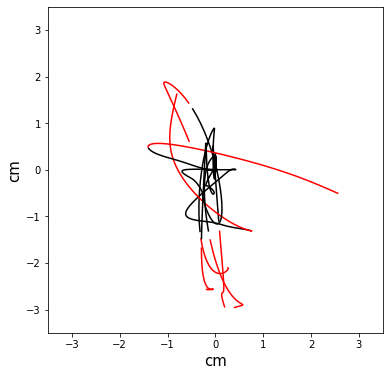

In [7]:
erfdn = np.load('Rats/Rats_ephy.npy')[[1]]

print(T1, T2)
fig = plt.figure(1, figsize=(6, 6))
gs  = GridSpec(1 , 1);
N_win = 10
t = np.arange(T2+T_pre)/fps;

rr = 0
for rfdn in erfdn:
    epn    = np.load(rfdn+'tracking'+'/epn_ephy.npy');
    n_acc_total = 0
    v_seg_0  = np.empty((0,T_pre+T2));
    v_seg_1  = np.empty((0,T_pre+T2));
    pos_Y_seg_1 = np.empty((0,T_pre+T2));
    pos_X_seg_1 = np.empty((0,T_pre+T2));
    idx_T = np.empty((0,));
    idx_T1 = np.empty((0,));
    idx_T2 = np.empty((0,));
    T_k    = np.empty((0,));
    
    kk = 0
    for k in epn:
        fdn = rfdn + k + '/'
        
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        l_t = np.sum(idx_clean)/fps/60
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        t_acc_f = np.load(fdn+'tracking/idx_acc_f.npy').astype('int');      
        n_acc = len(t_acc_f)
        
        T_acc_f = np.load(fdn+'tracking/T_acc_f.npy').astype('int');
        pos_Y = np.load(fdn+'tracking/pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/pos_X_f.npy')
        pos_Y = np.convolve(pos_Y, np.ones((6,))/6, mode='same')
        pos_X = np.convolve(pos_X, np.ones((6,))/6, mode='same')
        XY    = np.array([pos_X, pos_Y]).T;
        dis_ac = np.empty((0,));
        if n_acc>0:
            idx_ac = np.zeros((n_acc,))>1;
            for i in np.arange(n_acc):
                
                v_seg_0 = np.vstack((v_seg_0, spd_f[t_acc_f[i]:t_acc_f[i]+T2]))
                i_ref = t_acc_f[i]+T_acc_f[i]
                
                v_seg_1 = np.vstack((v_seg_1, spd_f[i_ref:i_ref+T2]))
                pos_Y_seg_1 = np.vstack((pos_Y_seg_1, pos_Y[i_ref:i_ref+T2]))
                pos_X_seg_1 = np.vstack((pos_X_seg_1, pos_X[i_ref:i_ref+T2]))
                d_max_T2, dis = tt.max_distance_k(XY[i_ref:i_ref+T2,:],    d_max*3/3, T2 - 30);
                idx_T  = np.append(idx_T,  d_max_T2)
                
#                 d_max_T2, dis = tt.max_distance_k(XY[i_ref:i_ref+T2,:],    d_max*1.0, T2-10);
                dis_ac = np.append(dis_ac, dis)
                idx_ac[i] = d_max_T2

        # indexing the event
        idx_acc_f_k = np.arange(n_acc_total, n_acc_total+n_acc)
        np.save(fdn+'tracking/idx_acc_f_k.npy', idx_acc_f_k);
        np.save(fdn+'tracking/dis_ac.npy',      dis_ac);
        n_acc_total = n_acc_total+n_acc
        
        T_k  = np.append(T_k,l_t)
        kk = kk+1
        
#     v_seg = v_seg[idx_T.astype('bool'), :]
    n_ac, T = v_seg_1.shape

    lag_m, lag_s, idx_lag_m = tt.align_acc(v_seg_1, 30, T1-60, T2-5)
#     idx_T = np.logical_and(idx_T1, idx_T2)
#     lag_m = np.zeros((n_ac,))
    np.save(rfdn+'tracking/lag_m.npy',       lag_m);
    np.save(rfdn+'tracking/idx_acc_f_T.npy', idx_T.astype('bool'));
    lag_m = lag_m/fps
    n_acc_T1 = 0
    n_acc_T2 = 0
    n_acc_T  = 1
    ax_idx = gs[rr, 0];ax = fig.add_subplot(ax_idx)
    for i in np.arange(n_ac):
        if i == idx_lag_m:  lw_mpl = 20
        else:  lw_mpl = 0.5
        
#         ax.plot(t, v_seg_0[i,:], 'b', lw = 0.1)
        
        #1
#         ax.plot(t, v_seg_1[i,:], 'b', lw = 0.1)
        
        #2
#         if idx_T[i]:
#             ax.plot(t+lag_m[i], v_seg_1[i,:], 'r', lw = 0.1*lw_mpl)
#             n_acc_T = n_acc_T+1
#         else:
#             ax.plot(t+lag_m[i], v_seg_1[i,:], 'b--', lw = 1)
        #XY
        if not idx_T[i]:
            ax.plot(pos_X_seg_1[i,0:T1]-pos_X_seg_1[i,0], 
                    pos_Y_seg_1[i,0:T1]-pos_Y_seg_1[i,0], 'k')
            ax.plot(pos_X_seg_1[i,T1:T2+T_pre]-pos_X_seg_1[i,0], 
                    pos_Y_seg_1[i,T1:T2+T_pre]-pos_Y_seg_1[i,0], 'r')
        
    #1
#     ax.plot(t[[T1-60,T2-5]], [-2,-2], 'k', lw = 3)
    
    
    

    rr += 1
ax_idx = gs[0,0];ax = fig.add_subplot(ax_idx);#ax.set_title('initially identified \n MI event');
# ax.plot([t[T1],t[T1]],[-5,30], 'k--', lw = 3)
# ax.set_ylim([-5,30]);ax.set_xlim([0,4]);
# ax.set_xlabel('time:(s)',  fontsize = 12)
# ax.set_ylabel('speed:cm/s',  fontsize = 12)
#0

# ax.text(t[T1]/2, -2.8, r'$MI0$',  fontsize = 15)
# ax.text((t[T1]+t[-1])/2, -2.8, r'$MI1$',  fontsize = 15)
#1

# ax.set_xlabel('time:(s)',  fontsize = 12)
# cor = Line2D([0], [0], color='k', lw = 3, label='correlation \n segement')
# ax.legend(handles=[cor], loc='upper left',  fontsize = 12)

#2
# ax.set_xlabel('time:(s)',  fontsize = 12)
# reference    = Line2D([0], [0], color='r', ls='-', lw = 2,  label='reference')
# qualified    = Line2D([0], [0], color='r', ls='-', lw = 0.3, label='qualified')
# disqualified = Line2D([0], [0], color='b', ls='--',lw = 1, label='disqualified')
# ax.legend(handles=[reference, qualified, disqualified], loc='upper left',  fontsize = 12)

# plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_2.png')
# plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.eps')
# plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI.svg')

ax.set_xlabel('cm',  fontsize = 15);ax.set_xlim([-3.5, 3.5])
ax.set_ylabel('cm',  fontsize = 15);ax.set_ylim([-3.5, 3.5])
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/disqualified.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


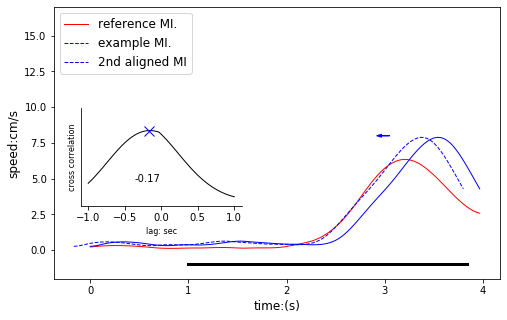

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(1, figsize=(8, 5))
gs  = GridSpec(1 , 1);



ac1 = idx_lag_m
ac2 = 120

v_ij_cor = np.correlate(v_seg_1[ac1, T1-60:T2-5], v_seg_1[ac2, T1-60:T2-5], "full")[T2-T1+55-30:T2-T1+55+31];

# print(v_ij_cor.shape, v_seg_1[ac1, T1-60:T2-5].shape, T2-T1+55-30, T2-T1+55+30, T2-T1+55)
ax_idx = gs[0, 0];ax = fig.add_subplot(ax_idx)
ax.plot(t, v_seg_1[ac1,:], 'r', lw = 1, label = 'MI event 1')
ax.plot(t, v_seg_1[ac2,:], 'b', lw = 1, label = 'MI event 2')
ax.plot(t[[T1-60,T2-5]], [-1,-1], 'k', lw = 3)


# np.argmax(v_ij_cor)-T_lag_max
dt = np.arange(-30,31)/fps

ax.plot(t+dt[np.argmax(v_ij_cor)], v_seg_1[ac2,:], 'b--', lw = 1)

ax.arrow(3.05, 8, dt[np.argmax(v_ij_cor)]*0.8, 0 , length_includes_head=True,
          head_width=0.2, head_length=0.05, color = 'blue'); ax.set_ylim([-2, 17]);
ax2 = inset_axes(ax, width="45%", height="45%",
            bbox_to_anchor=(.05, .25, .8, .8),
            bbox_transform=ax.transAxes, loc=3)
ax2.plot(dt,v_ij_cor, 'k', lw = 1)
ax2.plot(dt[np.argmax(v_ij_cor)],    np.max(v_ij_cor), 'bx', ms = 10)
ax2.text(dt[np.argmax(v_ij_cor)]-0.2,np.max(v_ij_cor)-700, str(np.round(dt[np.argmax(v_ij_cor)],2)))
ax2.set_ylim([0,np.max(v_ij_cor)*1.3]);
ax2.set_xlabel('lag: sec',         fontsize=8);
ax2.set_ylabel('cross correlation', fontsize=8)
ax2.spines['right'].set_visible(False);
ax2.spines['top'].set_visible(False); ax2.set_yticks([]);
ax.set_xlabel('time:(s)',  fontsize = 12)
ax.set_ylabel('speed:cm/s',  fontsize = 12)
preacc = Line2D([0], [0], color='r', ls = '-', lw=1, label='reference MI.')
acc    = Line2D([0], [0], color='b', ls = '--', lw=1, label='example MI.')
track  = Line2D([0], [0], color='b', ls='--', lw= 1, label='2nd aligned MI')

ax.legend(handles=[preacc, acc, track], loc='upper left', fontsize = 12)
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_cor.png')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_cor.eps')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_cor.pdf')

In [58]:
rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    tt.event_rate(rfdn, rats, epn, fs_out)
    r_ac = np.load(rfdn+'tracking/r_ac'+rats+'.npy')
    T_k  = np.load(rfdn+'tracking/T_k'+rats+'.npy')
    dis_ac  = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    print(rfdn[9:16],len(r_ac),len(T_k), len(dis_ac))
    
rats = '_post'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
# erfdn = np.load('Rats/Rats_ephy.npy')
for rfdn in erfdn:
    epn = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    tt.event_rate(rfdn, rats, epn, fs_out)
    r_ac = np.load(rfdn+'tracking/r_ac'+rats+'.npy')
    T_k  = np.load(rfdn+'tracking/T_k'+rats+'.npy')
    dis_ac  = np.load(rfdn+'tracking/dis_ac'+rats+'.npy')
    print(rfdn, rfdn[9:16],len(r_ac),len(T_k), len(dis_ac))

_pre
Swashbu 7 7 49
Outlaw/ 6 6 58
Drifter 9 9 83
Quartus 6 6 65
Lenny/ 3 3 34
_post
Rats/Rat_Swashbuckler/ Swashbu 13 13 56
Rats/Rat_Outlaw/ Outlaw/ 42 42 74
Rats/Rat_Drifter/ Drifter 15 15 62
Rats/Rat_Quartus/ Quartus 6 6 30
Rats/Rat_Lenny/ Lenny/ 8 8 37


Rats/Rat_Outlaw/
[ 38.  20.  31.  23.  14.   9.   5.   2.   7.  18.   8.  10.   1.  20.   3.]


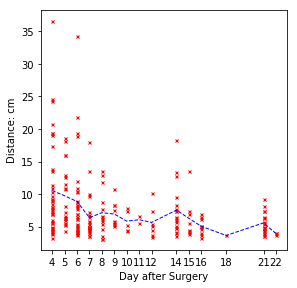

In [5]:
clr = ['r','b','g','k','orange','pink','purple']
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(15)
gs  = GridSpec(3, 3);

erfdn = np.load('Rats/Rats_ephy.npy')[[0,1,2,3,4]]
rr = 0
rfdn = erfdn[1]
epn   = np.load(rfdn+'tracking'+'/epn_ephy.npy')
epn_date   = np.load(rfdn+'tracking'+'/epn_ephy_date.npy').astype('int')
date = np.arange(epn_date.min(),epn_date.max()+1);
date_true = date<0
l_t = len(date)
r_date = np.zeros((l_t,))
d_date = np.zeros((l_t,))
# d_date = np.empty((l_t,),dtype=object)
n_r_date = np.zeros((l_t,))
n_d_date = np.zeros((l_t,))
print(rfdn)
idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy');
ax_idx = gs[rr]; ax = fig.add_subplot(ax_idx);
kk = 0
for k in epn:
    epn_date_k = epn_date[kk]
    
    n_r_date[date==epn_date_k] = n_r_date[date==epn_date_k]+1

    fdn = rfdn + k + '/'
    ts_f        = np.load(fdn+'tracking/ts_f.npy');
    idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
    idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
    dis_ac      = np.load(fdn+'tracking/dis_ac.npy');
    n_acc = len(idx_acc_f)
    if n_acc>0:
        


        idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
        idx_acc_f     = idx_acc_f[idx_acc_f_T_k]
        dis_ac        = dis_ac[idx_acc_f_T_k]
        n_acc = len(idx_acc_f)
        
        
        if n_acc>0:
            date_true[date==epn_date_k] = True
            n_d_date[date==epn_date_k] = n_d_date[date==epn_date_k] + len(idx_acc_f)

            if np.sum(dis_ac)==0:
                print(k,epn_date_k,n_acc, dis_ac, len(idx_acc_f))
            d_date[date==epn_date_k] = d_date[date==epn_date_k] + np.sum(dis_ac)
            ax.plot(epn_date_k*np.ones((len(dis_ac),)), dis_ac,'x', ms = 3, color=clr[rr])
        kk = kk+1
ax.plot(date[date_true], d_date[date_true]/n_d_date[date_true],'b--', lw = 1, color=clr[1])
# ax.plot(date[date_true], d_date[date_true]/n_d_date[date_true],'bx', ms = 10, color=clr[1])
rr = rr+1
ax.set_xticks(date[date_true]);
ax.set_xlabel('Day after Surgery', fontsize=10)
ax.set_ylabel('Distance: cm', fontsize=10)
print(n_d_date[date_true])
# ax.set_ylim([0,25])



In [ ]:
erfdn = np.load('Rats/Rats_ephy.npy')[[1]]

print(T1, T2)
fig = plt.figure(1, figsize=(6, 6))
gs  = GridSpec(1 , 1);
N_win = 10
t = np.arange(T2+T_pre)/fps;

rr = 0
for rfdn in erfdn:
    epn    = np.load(rfdn+'tracking'+'/epn_ephy.npy');
    n_acc_total = 0
    v_seg_0  = np.empty((0,T_pre+T2));
    v_seg_1  = np.empty((0,T_pre+T2));
    pos_Y_seg_1 = np.empty((0,T_pre+T2));
    pos_X_seg_1 = np.empty((0,T_pre+T2));
    idx_T = np.empty((0,));
    idx_T1 = np.empty((0,));
    idx_T2 = np.empty((0,));
    T_k    = np.empty((0,));
    
    kk = 0
    for k in epn:
        fdn = rfdn + k + '/'
        
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        l_t = np.sum(idx_clean)/fps/60
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        t_acc_f = np.load(fdn+'tracking/idx_acc_f.npy').astype('int');      
        n_acc = len(t_acc_f)
        
        T_acc_f = np.load(fdn+'tracking/T_acc_f.npy').astype('int');
        pos_Y = np.load(fdn+'tracking/pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/pos_X_f.npy')
        pos_Y = np.convolve(pos_Y, np.ones((6,))/6, mode='same')
        pos_X = np.convolve(pos_X, np.ones((6,))/6, mode='same')
        XY    = np.array([pos_X, pos_Y]).T;
        dis_ac = np.empty((0,));
        if n_acc>0:
            idx_ac = np.zeros((n_acc,))>1;
            for i in np.arange(n_acc):
                i_ref = t_acc_f[i]+T_acc_f[i]    

        kk = kk+1


    
    
    

    rr += 1
